## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people, one group follows the first diet and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

# Hypothesis testing problems

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway


diet_1 = [2, 2.5, 3, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3, 3.2, 3.1, 2.9, 2.8, 3, 3.2]
print(np.mean(diet_1))
print(np.mean(diet_2))


# H0 : No hay una diferencia significativa en el promedio de perdida de peso entre los individuos que siguieron la dieta 1 y los que siguieron la dieta 2.
# H1 : La perdida de peso promedio ha sido sgnificativamnte diferente entre las dos dietas 
t_stat, p_value = ttest_ind(diet_2, diet_1)
print(f'T-statistic value: {t_stat}')  
print(f'P-Value: {p_value}')

2.542857142857143
3.0285714285714285
T-statistic value: 3.5383407969933938
P-Value: 0.004083270191713912


In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
  
X_axis = np.arange(len(x)) 
  
plt.bar(X_axis - 0.2, diet_1, 0.4, label = 'diet 1') 
plt.bar(X_axis + 0.2, diet_2, 0.4, label = 'diet 2') 
  
plt.xticks(X_axis, x) 
plt.xlabel("participants") 
plt.ylabel("weight lost per participant") 
plt.title("weight lost per participant and diet") 
plt.legend() 
plt.show()

## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically are:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

### Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

In [45]:
fertilizante_1 = [20, 21, 20, 19, 20]
fertilizante_2 = [22, 21, 23, 22, 21]
fertilizante_3 = [24, 23, 22, 23, 24]
df = pd.DataFrame({'fertilizante 1' : fertilizante_1, 'fertilizante 2': fertilizante_2, 'fertilizante 3': fertilizante_3})


fertilizante 1    20.0
fertilizante 2    21.8
fertilizante 3    23.2
dtype: float64
fertilizante 1    0.707107
fertilizante 2    0.836660
fertilizante 3    0.836660
dtype: float64


<Axes: xlabel='Fertilizantes', ylabel='Kg obtenidos'>

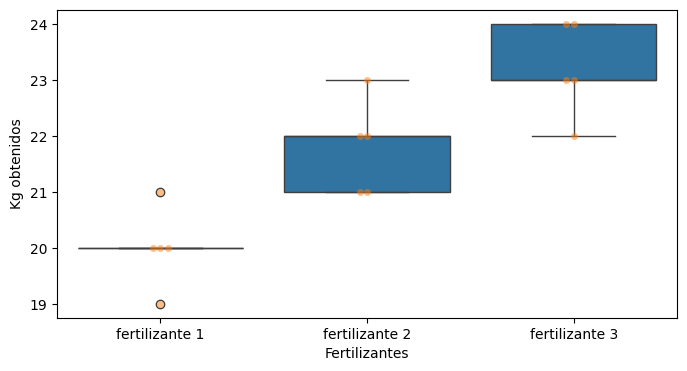

In [46]:
print(df.mean())
print(df.std())
import seaborn as sns
df_melted = pd.melt(df, var_name='Fertilizantes', value_name='Kg obtenidos')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="Fertilizantes", y="Kg obtenidos", data=df_melted, ax=ax)
sns.swarmplot(x="Fertilizantes", y="Kg obtenidos", data=df_melted, alpha = 0.5, ax=ax)


In [50]:
t_stat, p_value = f_oneway(fertilizante_1, fertilizante_2, fertilizante_3)
print(f'T-statistic value: {t_stat}')  
print(f'P-Value: {p_value}')

T-statistic value: 20.315789473684188
P-Value: 0.00014047824793190475


### FIN DE LOS EJERCICIOS 
Ahora pruebas con lo que comento felix que veriamos hoy

In [143]:
#El test de normalidad se utiliza para determinar si un conjunto de datos sigue una distribución normal. 
#Esto es importante porque muchos tests estadísticos asumen que los datos están normalmente distribuidos. stats.normaltest 
from scipy import stats
from scipy.stats import normaltest
#creamos datos de prueba
horas_estudio = np.random.uniform(0, 50, 100)   
efecto_estudio =  0.15
calificaciones = 1 + efecto_estudio * horas_estudio + np.random.normal(0, 3, 100)
calificaciones2 = 1+ efecto_estudio*np.random.uniform(3, 100, 100)+ np.random.normal(0, 3, 100)

#test de normalidad
statistic, p_value = stats.normaltest(calificaciones2)
print(f'statistic value: {statistic}')  
print(f'P-Value: {p_value}')
#p-value es bajo, tenemos evidencia de que los datos no se distribuyen normalmente


statistic value: 3.0697421907661147
P-Value: 0.21548346619320632


In [137]:
import random
from scipy.stats import levene

#Test de Levene (stats.levene): Se utiliza para verificar si diferentes muestras tienen varianzas iguales
statistic, p_value = stats.levene(calificaciones, calificaciones2)
print(f'statistic value: {statistic}')  
print(f'P-Value: {p_value}')
#Un p-value alto indica que no hay evidencia suficiente para afirmar que las varianzas son diferentes

statistic value: 0.5151056535654854
P-Value: 0.47378288746082087


In [136]:

statistic, p_value = stats.ttest_ind(calificaciones, calificaciones2)
print(f'statistic value: {statistic}')  
print(f'P-Value: {p_value}')

statistic value: -0.6440159026339721
P-Value: 0.5203104317098666


### TTEST_IND YA LO HEMOS VISTO EN EL PRIMER EJERCICIO

In [144]:
from scipy.stats  import ttest_1samp
# ttest_1samp se utiliza para determinar si la media de una muestra difiere significativamente de una media teórica o poblacional conocida
media = np.mean(calificaciones)
t_statistic, p_value = stats.ttest_1samp(calificaciones2, media)
print(f'statistic value: {t_statistic}')  
print(f'P-Value: {p_value}')
# Si el p-value es menor que un umbral (usualmente 0.05), entonces hay evidencia estadística suficiente para rechazar 
#la hipótesis nula de que la media de la muestra es igual a la media teórica, y aceptar que existe una diferencia significativa.

statistic value: 9.451709046830018
P-Value: 1.7187601449347018e-15
